# Support vector machines

Author:Nutan Mandale

Mentor: Vincent Ramdhanie

### Data Description

Data set is drawn from the larger epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.
The dataset can be found on Kaggle.

### Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data
data = pd.read_csv('./epi_r.csv')

### Data analysis

In [3]:
data.shape

(20052, 680)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [5]:
data.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)

In [6]:
data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

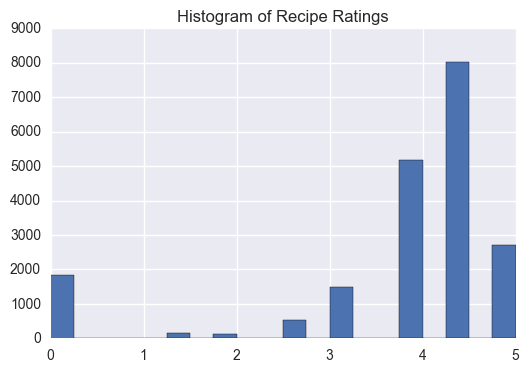

In [7]:
data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [8]:
data.isnull().any().any()

True

In [9]:
# Count nulls 
null_count = data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [10]:
data = data.dropna()

Removing the null data

In [11]:
data.shape

(15864, 680)

In [12]:
data.dtypes

title                     object
rating                   float64
calories                 float64
protein                  float64
fat                      float64
sodium                   float64
#cakeweek                float64
#wasteless               float64
22-minute meals          float64
3-ingredient recipes     float64
30 days of groceries     float64
advance prep required    float64
alabama                  float64
alaska                   float64
alcoholic                float64
almond                   float64
amaretto                 float64
anchovy                  float64
anise                    float64
anniversary              float64
anthony bourdain         float64
aperitif                 float64
appetizer                float64
apple                    float64
apple juice              float64
apricot                  float64
arizona                  float64
artichoke                float64
arugula                  float64
asian pear               float64
          

In [13]:
data['rating'] = data['rating'].map(lambda x: 1 if x >= 3.7 else 0)
data['rating'].head()

0    0
1    1
2    1
4    0
5    1
Name: rating, dtype: int64

In [14]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,1,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,1,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,0,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,1,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


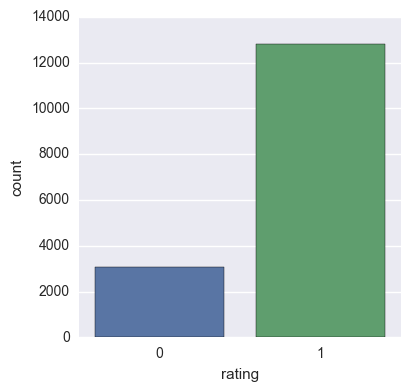

In [15]:
sns.factorplot('rating',data=data,kind='count');

In [16]:
# Try PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
data_reduced = pca.fit_transform(data.drop(['rating', 'title'], axis=1))

In [17]:
df2 = pd.DataFrame(data=data_reduced)
df = pd.concat([data[['title', 'rating']], df2], axis=1)

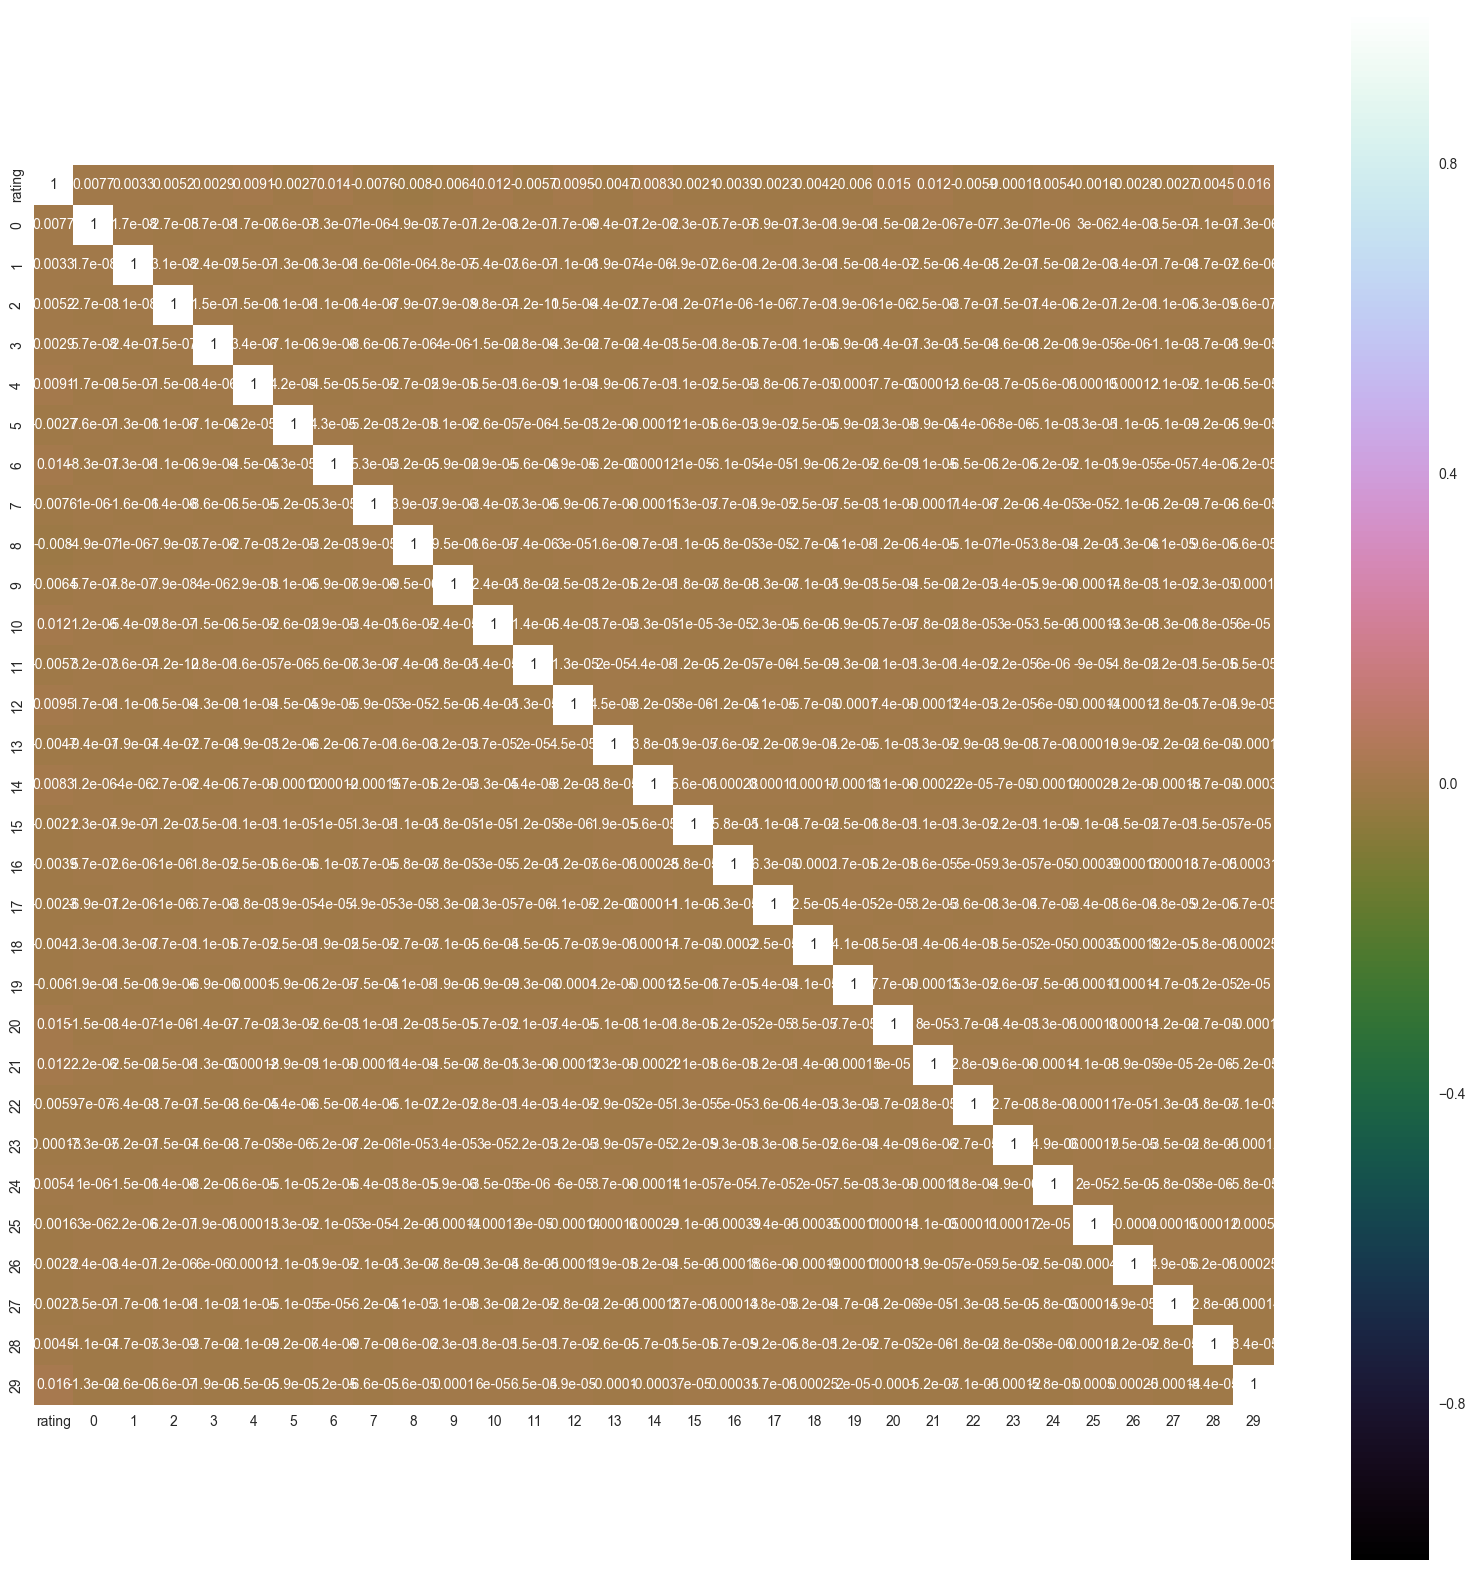

In [18]:
corr_mat=df[2:].corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix', ax=ax);

We get a good correlation matrix here.

In [19]:
df.columns

Index([ 'title', 'rating',        0,        1,        2,        3,        4,
              5,        6,        7,        8,        9,       10,       11,
             12,       13,       14,       15,       16,       17,       18,
             19,       20,       21,       22,       23,       24,       25,
             26,       27,       28,       29],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19137 entries, 0 to 20051
Data columns (total 32 columns):
title     15864 non-null object
rating    15864 non-null float64
0         15864 non-null float64
1         15864 non-null float64
2         15864 non-null float64
3         15864 non-null float64
4         15864 non-null float64
5         15864 non-null float64
6         15864 non-null float64
7         15864 non-null float64
8         15864 non-null float64
9         15864 non-null float64
10        15864 non-null float64
11        15864 non-null float64
12        15864 non-null float64
13        15864 non-null float64
14        15864 non-null float64
15        15864 non-null float64
16        15864 non-null float64
17        15864 non-null float64
18        15864 non-null float64
19        15864 non-null float64
20        15864 non-null float64
21        15864 non-null float64
22        15864 non-null float64
23        15864 non-null float64
24        15864 non-null float64
2

In [21]:
df.shape

(19137, 32)

In [22]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

title     3273
rating    3273
0         3273
1         3273
2         3273
3         3273
4         3273
5         3273
6         3273
7         3273
8         3273
9         3273
10        3273
11        3273
12        3273
13        3273
14        3273
15        3273
16        3273
17        3273
18        3273
19        3273
20        3273
21        3273
22        3273
23        3273
24        3273
25        3273
26        3273
27        3273
28        3273
29        3273
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.shape

(12591, 32)

### Building the model

In [25]:
y = df.rating

In [26]:
y.head()

0    0.0
1    1.0
2    1.0
4    0.0
5    1.0
Name: rating, dtype: float64

In [27]:
X = df.drop(["rating","title"], axis=1)
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-8223.142475,-142.739568,-15.782235,-20.268463,-0.975802,-0.027370,-0.011212,0.002434,0.053445,0.284519,...,-0.290294,0.133745,-0.165974,-0.232376,0.013634,0.954386,0.546219,-0.157546,-0.146154,-0.601195
1,-7641.311444,514.331186,-56.083359,38.344665,-0.965857,0.561189,-0.535005,0.536621,-0.296770,-0.054662,...,-0.148400,0.526028,-0.033781,0.033846,0.285858,-0.136777,0.088915,0.269197,0.042218,0.280527


In [28]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Let us split the data into train and test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [30]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))


Accuracy Score:
0.829415501906


### Linear kernel

In [31]:
svc=SVC(kernel='linear',C=1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.829415501906


### RBF kernel

In [32]:
svc=SVC(kernel='rbf',C=1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.829415501906


### Poly Kernel

In [33]:
svc=SVC(kernel='poly',C=1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.823379923761


Polynomial kernel is performing poorly as compared to other 2. Let us do crossvalidation now.

### Cross validation on linear kernel

In [34]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

C:\Users\NutanMandale\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.80873016  0.80873016  0.80873016  0.80937252  0.80937252  0.80937252
  0.80937252  0.80937252  0.80922099  0.80922099]


In [35]:
print(scores.mean())

0.809149503693


### Cross validation on rbf kernel

In [36]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)


[ 0.80873016  0.80873016  0.80873016  0.80937252  0.80937252  0.80937252
  0.80937252  0.80937252  0.80922099  0.80922099]


In [37]:
print(scores.mean())

0.809149503693


### Cross validation on poly kernel

In [38]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[ 0.80952381  0.80555556  0.80714286  0.80698967  0.80540111  0.80619539
  0.80619539  0.80698967  0.80922099  0.80683625]


In [39]:
print(scores.mean())

0.807005070295


#### Taking all the values of C and checking out the accuracy score with kernel as linear.

In [ ]:
C_range=list(range(1,20))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

In [ ]:
C =list(range(1,20))
plt.plot(C,acc_score)
plt.xticks(np.arange(0,25,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')